In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import collections
import matplotlib.pyplot as plt
import sys
sys.path.append('../lib')
import visuals as vs

%matplotlib inline

%run ../src/load_deskew.py

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'FirstFlrSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=383)


In [2]:
features = ['GrLivArea','FirstFlrSF','ExterQual_TA',
            'YearBuilt','FullBath_1','YearRemodAdd',
            'KitchenQual_TA','Foundation_PConc',
            'GarageCars_3','ExterQual_Gd']

In [3]:
whos DataFrame

Variable             Type         Data/Info
-------------------------------------------
housing_df           DataFrame         MSSubClass MSZoning <...>n[1451 rows x 80 columns]
housing_gelman_df    DataFrame          LotFrontage   LotAr<...>[1451 rows x 383 columns]
housing_log_df       DataFrame          LotFrontage    LotA<...>[1451 rows x 383 columns]
housing_one_hot_df   DataFrame          LotFrontage  LotAre<...>[1451 rows x 383 columns]
listing_df           DataFrame            Id Street Alley  <...>n[1460 rows x 62 columns]
sale_df              DataFrame            Id  MoSold  YrSol<...>\n[1460 rows x 6 columns]
zoning_df            DataFrame            Id  MSSubClass MS<...>n[1460 rows x 15 columns]


In [4]:
from sklearn.decomposition import PCA
pca = PCA(20)
pca.fit(housing_gelman_df)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

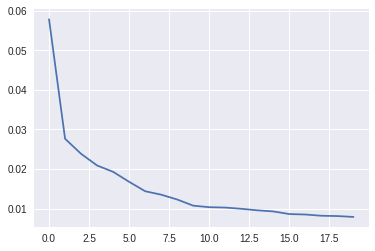

In [5]:
plt.plot(pca.explained_variance_ratio_)

In [6]:
pca = PCA(6)
pca.fit(housing_gelman_df[features])

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

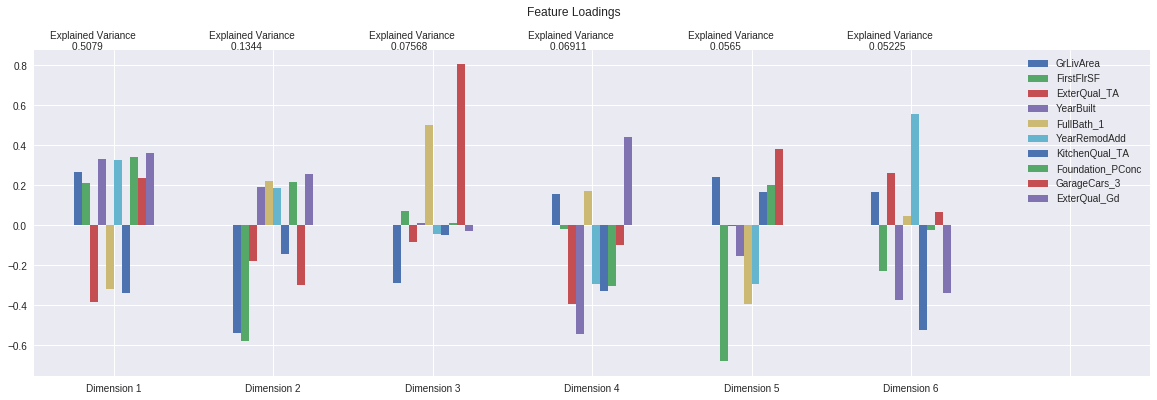

In [7]:
gelman_loading_plot = vs.FeatureLoadingsPlot(housing_gelman_df[features], pca, 6)
gelman_loading_plot.display_segments()

## Dimension 1
This first principal component describes the most common type of home in Ames, Iowa. Often when neighborhoods are being developed, a contractor may use similar floor plans. What I hypothesize here is that this component describes a "typical" Ames home that is in good condition on the outside and is of average square footage. It is most likely a newer construction with some recent remodeling. 


100%|██████████| 3/3 [00:00<00:00, 13.24it/s]

For n_clusters = 2 the silhouette score is 0.44310005826728693.
For n_clusters = 3 the silhouette score is 0.42784635941923493.
For n_clusters = 4 the silhouette score is 0.36894854042964464.


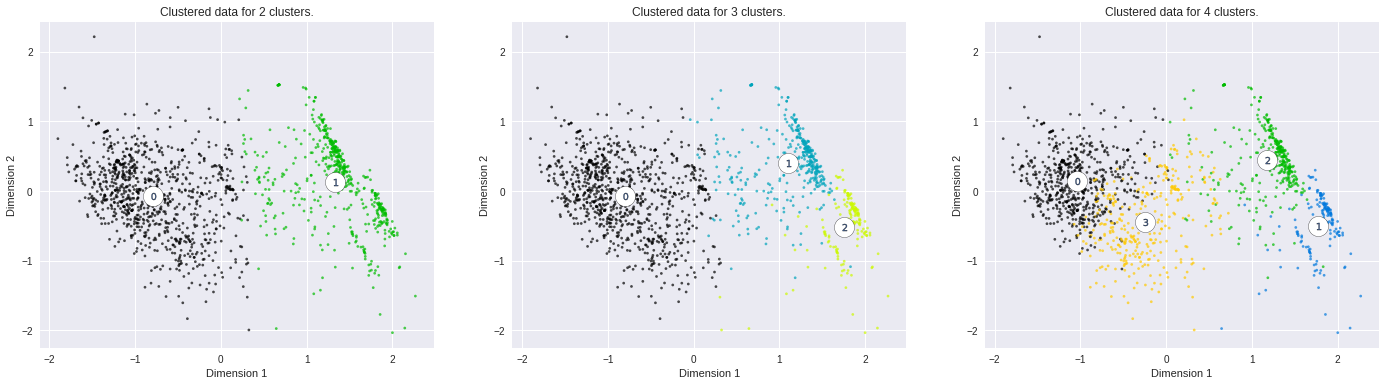

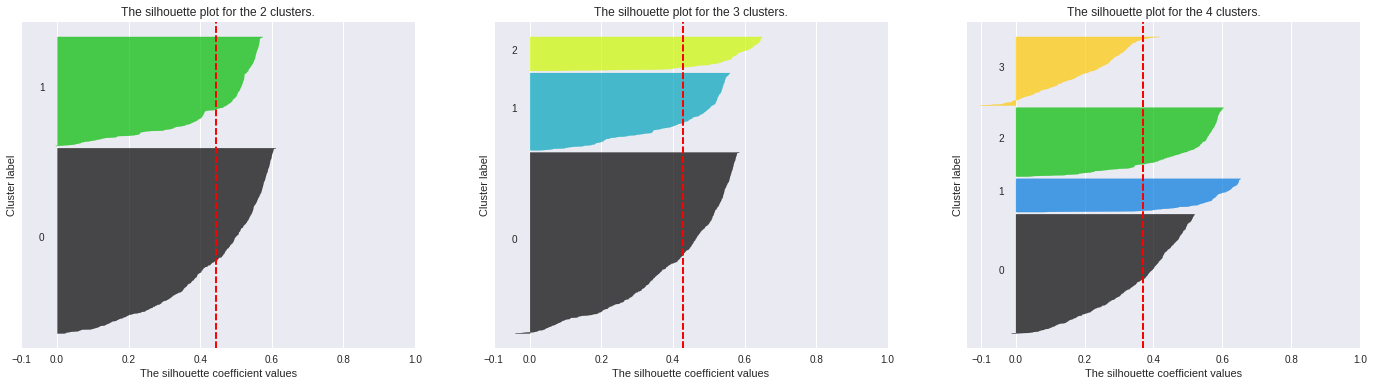

In [8]:
dims_6 = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4', 'Dimension 5', 'Dimension 6']
gelman_pca_df = pd.DataFrame(pca.transform(housing_gelman_df[features]))
gelman_pca_df.columns = dims_6

gelman_pca_clusters = vs.Clusters(gelman_pca_df, [2,3,4])
gelman_pca_clusters.cluster_plots()
gelman_pca_clusters.silhouette_plots()